# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset path
data_dir = "../input/gtsrb-german-traffic-sign"
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))
print("Dataset Loaded!", train_csv.shape)

Dataset Loaded! (39209, 8)


In [3]:
# Prepare images and labels
X, y = [], []
for i, row in train_csv.iterrows():
    img_path = os.path.join(data_dir, row['Path'])
    image = cv2.imread(img_path)
    image = cv2.resize(image, (32, 32))  # Resize to 32x32
    X.append(image)
    y.append(row['ClassId'])

In [4]:
X = np.array(X) / 255.0  # Normalize images

In [5]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)   # It one-hot encodes class labels.

# Train-Test Split

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split Done! Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Data Split Done! Train Shape: (31367, 32, 32, 3) Test Shape: (7842, 32, 32, 3)


In [7]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1)


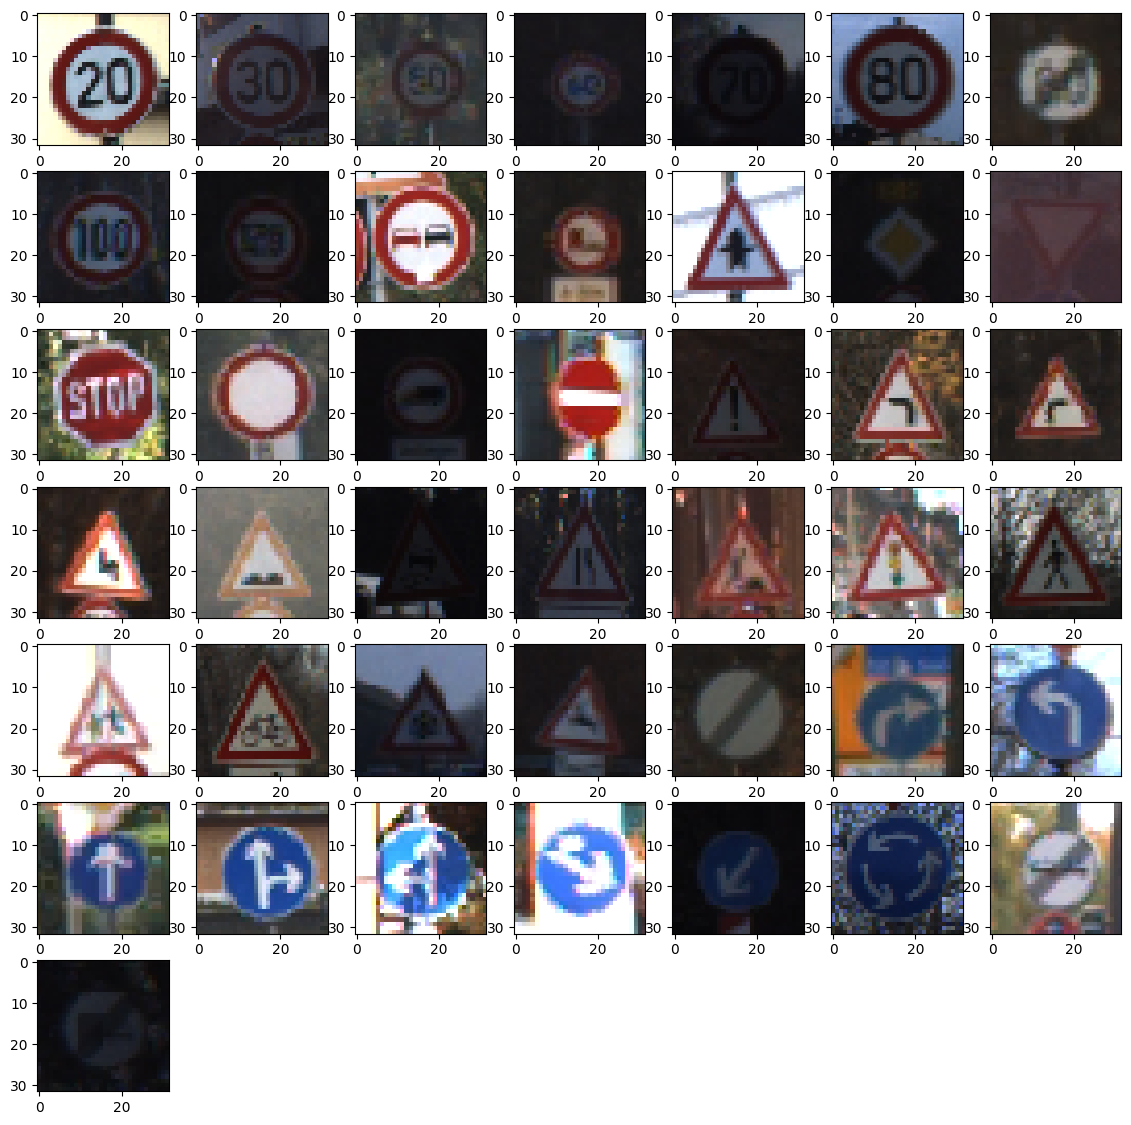

In [8]:
# Visualizing all the different Signs
NUM_CATEGORIES = 43  # Number of classes
IMG_WIDTH, IMG_HEIGHT = 32, 32
train_path = os.path.join(data_dir, "Train")
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14, 14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()


# glob() is a function that searches for files and folders using wildcards 
# (* for any file, ? for single character, etc.).

# Model Architecture

In [10]:
# Building CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes
])

In [11]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model

In [12]:
# Training Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=15)

# flow() works with NumPy arrays

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.2305 - loss: 2.7931 - val_accuracy: 0.8027 - val_loss: 0.7040
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7330 - loss: 0.8268 - val_accuracy: 0.9319 - val_loss: 0.2348
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8692 - loss: 0.4225 - val_accuracy: 0.9644 - val_loss: 0.1221
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9138 - loss: 0.2754 - val_accuracy: 0.9742 - val_loss: 0.0824
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9388 - loss: 0.2062 - val_accuracy: 0.9830 - val_loss: 0.0623
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9491 - loss: 0.1676 - val_accuracy: 0.9878 - val_loss: 0.0455
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9585 - loss: 0.1368 - val_accuracy: 0.9856 - val_loss: 0.0480
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9630 - loss: 0.1163 - 

# Model Accuracy on Test data

In [13]:
# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9926 - loss: 0.0223
Test Accuracy: 99.26%


Text(0.5, 1.0, 'Model Accuracy')

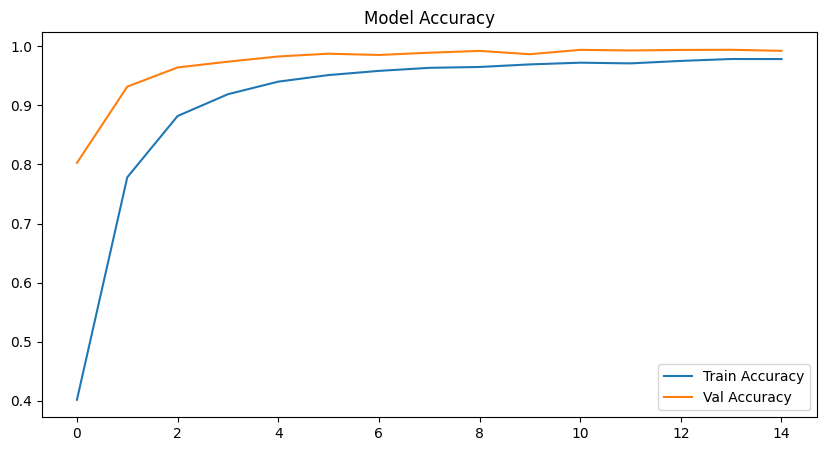

In [14]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

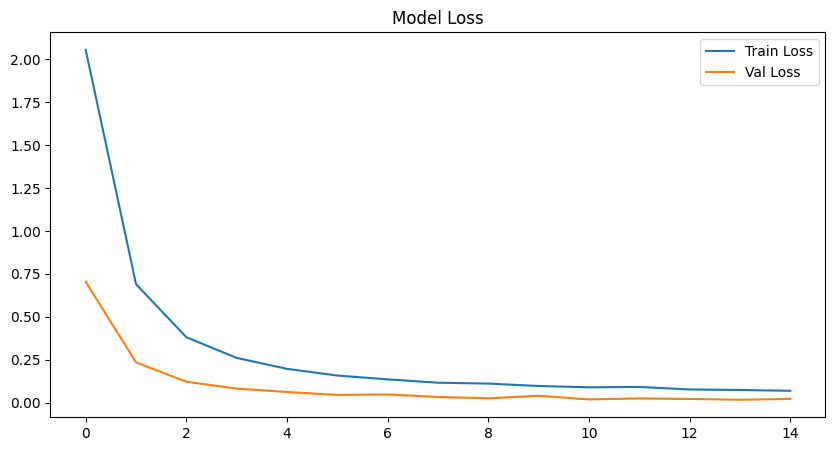

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9926 - loss: 0.0223
Test Accuracy: 0.9926038980484009
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


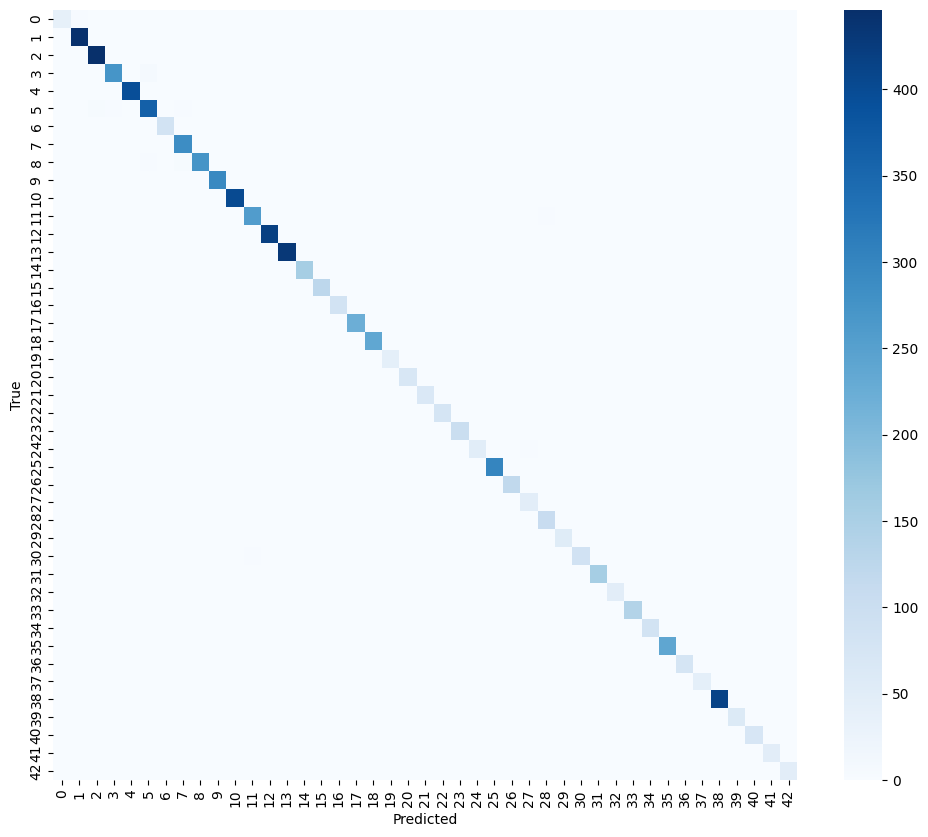

In [27]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


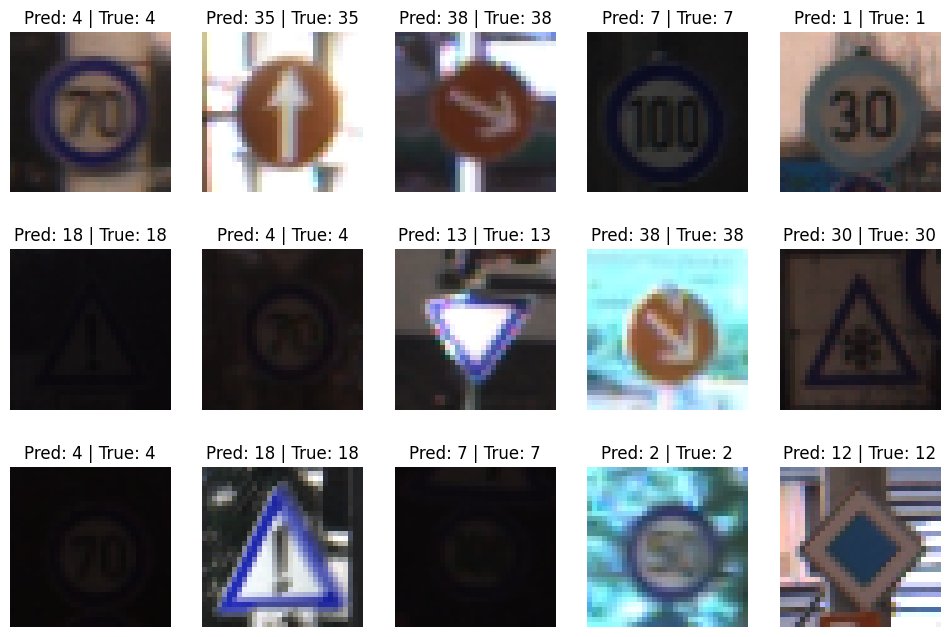

In [16]:
# Predict Sample Images
def predict_sample_images():
    fig, axes = plt.subplots(3, 5 , figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        img = X_test[i]
        true_label = np.argmax(y_test[i])
        pred_label = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
        ax.imshow(img)
        ax.set_title(f"Pred: {pred_label} | True: {true_label}")
        ax.axis('off')
    plt.show()

predict_sample_images()


In [17]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [26]:
model.save("traffic_sign_model.h5")
